In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
iris = load_iris()
X, y = iris.data, iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

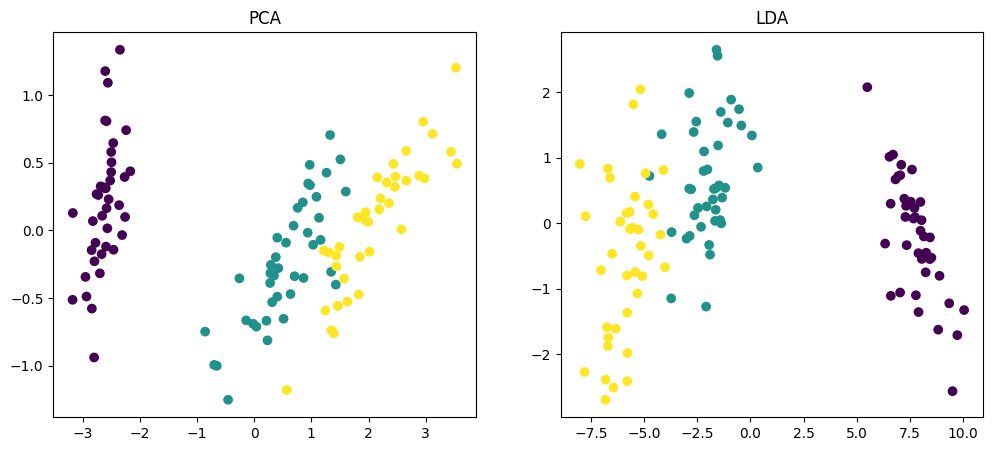

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA')

plt.subplot(1, 2, 2)
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis')
plt.title('LDA')

plt.show()

1. PCA is generally applicable to a wide range of datasets, including the IRIS dataset. It aims to reduce the dimensionality of data while preserving the most important variance.   
2. PCA is particularly well-suited for the IRIS dataset because it has a relatively small number of features (4) and clear separation between the classes. 
3. PCA can effectively capture the underlying structure of the data and help visualize the relationships between the features and classes

1. LDA is specifically designed for classification tasks and is most effective when the classes are well-separated and linearly separable.   
2. While the IRIS dataset is generally linearly separable, LDA's effectiveness can depend on the specific distribution of the data within each class.
3. If the class distributions are highly overlapping, LDA might not be as effective as PCA in terms of dimensionality reduction and classification performance.

### PCA (Principal Component Analysis):

**Goal:** Reduces dimensionality while preserving the most important variance in the data.   

**Focus:** Uncovers the underlying structure of the data and identifies the principal components that explain most of the variation.   

**Approach:** Finds the eigenvectors of the covariance matrix and projects the data onto the corresponding principal components.   

**Classification:** Not directly a classification technique, but can be used as a preprocessing step to reduce dimensionality and improve the performance of classifiers.

### LDA (Linear Discriminant Analysis):

**Goal:** Reduces dimensionality while maximizing class separation.   

**Focus** Finds linear combinations of features that best distinguish between different classes.

**Approach:** Calculates the mean and covariance matrix for each class and projects the data onto the discriminant directions that maximize the ratio of between-class variance to within-class variance.

**Classification:** Inherently a classification technique, as it directly projects the data onto a subspace that maximizes class separation.

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [49]:
data = pd.read_csv('sales.csv')

In [50]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [65]:
data = data.drop(columns=['Date'])

In [74]:
data = data.drop(columns=['Unemployment'])

In [80]:
data = data.drop(columns=['Fuel_Price'])
data = data.drop(columns=['CPI'])

In [86]:
data = data.drop(columns=['Temperature'])

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 201.2 KB


In [88]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [89]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
pca = PCA(n_components=2)  # Choose the desired number of components
X_pca = pca.fit_transform(X_scaled)

In [92]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Choose the desired number of components
X_lda = lda.fit_transform(X_scaled, y)

In [93]:
import matplotlib.pyplot as plt

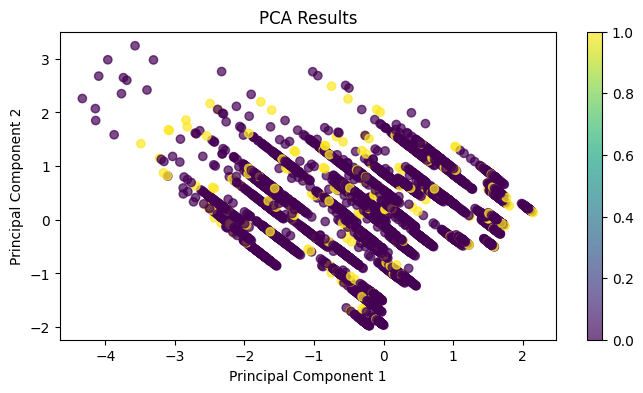

In [94]:
plt.figure(figsize=(8, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

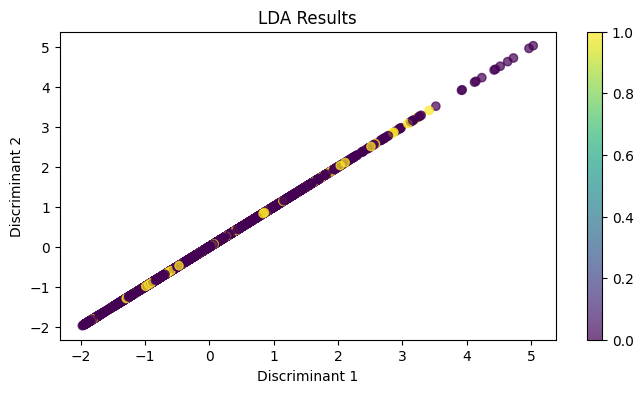

In [96]:
plt.figure(figsize=(8, 4))
plt.scatter(X_lda[:, 0], X_lda[:, 0], c=y, cmap='viridis', alpha=0.7)
plt.title('LDA Results')
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.colorbar()
plt.show()

### PCA

PCA is an unsupervised technique that aims to find the principal components of a dataset, which are the directions of maximum variance. 

It is useful when:   
1. You have a large number of features and want to reduce dimensionality without losing important information.
2. You want to visualize high-dimensional data in a lower-dimensional space.
3. You want to identify patterns or correlations within the data.

Steps to apply PCA:

1. Standardize the data: Ensure that all features have a mean of 0 and a standard deviation of 1.
2. Calculate the covariance matrix: Compute the covariance matrix of the standardized data.
3. Find the eigenvectors and eigenvalues of the covariance matrix: These represent the principal components and their variances, respectively.
4. Select the principal components: Choose the components with the highest eigenvalues to retain most of the variance.
5. Project the data onto the selected principal components: This reduces the dimensionality of the data.

### LDA

LDA is a supervised technique that aims to find linear combinations of features that best separate the classes in a dataset. 

It is useful when:   

1. You have a classification problem and want to improve the performance of your model by reducing dimensionality.
2. You want to visualize the class separation in a lower-dimensional space.

Steps to apply LDA:

1. Calculate the class means: Compute the mean of each class in the dataset.
2. Calculate the within-class scatter matrix: Compute the scatter matrix within each class.
3. Calculate the between-class scatter matrix: Compute the scatter matrix between the classes.
4. Find the eigenvectors of the inverse of the within-class scatter matrix multiplied by the between-class scatter matrix: These represent the discriminant directions.
5. Select the discriminant directions: Choose the directions with the highest eigenvalues to retain most of the class separation.
6. Project the data onto the selected discriminant directions: This reduces the dimensionality of the data while preserving class separation.   
